In [1]:
# Import data from CSV file
# Country-level data, range 1998 to 2018

import pandas as pd
import numpy as np
import os
os.chdir("/Users/paulbogowicz/Documents/Research/Oxford University/OpenPrescribing - antidepressants/Data")

df = pd.read_csv("results-20200204-171634.csv")

# Rename columns and rearrange data set

df = df.rename(columns={"year":"Year","chemical_substance":"Medication"})
dfraw = df.pivot(index = "Year", columns = "Medication", values = "items")
dfstand = df.pivot(index = "Year", columns = "Medication", values = "items_per_1000")
display(dfraw.head())
display(dfstand.head())

# # View latest year results in ascending order
# temp = dfraw.iloc[-1]
# temp.sort_values()

Medication,Amitriptyline,Amoxapine,Citalopram,Clomipramine,Desipramine,Dosulepin,Doxepin,Duloxetine,Escitalopram,Fluoxetine,...,Nortriptyline,Other,Paroxetine,Phenelzine,Protriptyline,Sertraline,Tranylcypromine,Trazodone,Trimipramine,Venlafaxine
Year,,,,,,,,,,,,,,,,,,,,,
1998,3425200.0,7200.0,519700.0,502700.0,200.0,3369600.0,160500.0,NaN,NaN,3259300.0,...,148000.0,540900.0,2719100.0,39900.0,9700.0,1031500.0,41300.0,360200.0,268300.0,599200.0
1999,3713300.0,5600.0,1213900.0,480900.0,NaN,3253700.0,154500.0,NaN,NaN,3437300.0,...,145400.0,535300.0,3144900.0,36900.0,8900.0,1087900.0,33300.0,383200.0,249100.0,824600.0
2000,3992865.0,4203.0,2014146.0,456427.0,NaN,3150328.0,151882.0,NaN,NaN,3662407.0,...,137317.0,513742.0,3452272.0,33968.0,4013.0,1272944.2,25045.0,411494.0,229885.0,1092733.0
2001,4333424.0,3614.0,2811677.0,432684.0,NaN,3030927.0,146095.0,NaN,NaN,4006468.0,...,138077.0,493722.0,3786829.0,32271.0,NaN,1443111.0,23259.0,461893.0,211913.0,1503647.0
2002,4648177.0,3234.0,3648979.0,410455.0,NaN,2859880.0,139895.0,NaN,91270.0,4208583.0,...,138332.0,458656.0,3680452.0,30514.0,NaN,1641161.0,19924.0,504428.0,194354.0,2083201.0


Medication,Amitriptyline,Amoxapine,Citalopram,Clomipramine,Desipramine,Dosulepin,Doxepin,Duloxetine,Escitalopram,Fluoxetine,...,Nortriptyline,Other,Paroxetine,Phenelzine,Protriptyline,Sertraline,Tranylcypromine,Trazodone,Trimipramine,Venlafaxine
Year,,,,,,,,,,,,,,,,,,,,,
1998,70.158908,0.147479,10.645097,10.296883,0.004097,69.020045,3.287547,NaN,NaN,66.760753,...,3.031507,11.079339,55.695751,0.817278,0.198687,21.128376,0.845954,7.378033,5.495631,12.273507
1999,75.730785,0.114209,24.756847,9.807701,NaN,66.357487,3.150946,NaN,NaN,70.101911,...,2.965356,10.917160,64.138568,0.752556,0.181511,22.187144,0.679136,7.815161,5.080262,16.817280
2000,81.100901,0.085369,40.910238,9.270697,NaN,63.987748,3.084945,NaN,NaN,74.388818,...,2.789108,10.434848,70.120670,0.689940,0.081510,25.855350,0.508700,8.358042,4.669299,22.194998
2001,87.632968,0.073084,56.859334,8.749982,NaN,61.293132,2.954416,NaN,NaN,81.021078,...,2.792272,9.984328,76.579413,0.652603,NaN,29.183413,0.470357,9.340663,4.285425,30.407606
2002,93.563657,0.065098,73.450693,8.262093,NaN,57.566834,2.815962,NaN,1.837184,84.715022,...,2.784500,9.232336,74.084216,0.614220,NaN,33.035107,0.401052,10.153686,3.912173,41.932978


In [11]:
# Calculate totals for each year and for each class, note that other does not include mirtazapine/trazodone

All = list(["Amitriptyline","Amoxapine","Citalopram","Clomipramine","Desipramine","Dosulepin","Doxepin","Duloxetine","Escitalopram","Fluoxetine","Fluvoxamine","Imipramine","Isocarboxazid","Lofepramine","Mirtazapine","Moclobemide","Nortriptyline","Other","Paroxetine","Phenelzine","Protriptyline","Sertraline","Tranylcypromine","Trazodone","Trimipramine","Venlafaxine"])
SSRIs = list(["Citalopram","Escitalopram","Fluoxetine","Fluvoxamine","Paroxetine","Sertraline"])
SNRIs = list(["Duloxetine","Venlafaxine"])
Tricyclics = list(["Amitriptyline","Dosulepin","Lofepramine","Trimipramine","Amoxapine","Protriptyline","Clomipramine","Nortriptyline","Doxepin","Imipramine","Desipramine"])
MAOI = list(["Moclobemide","Phenelzine","Tranylcypromine","Isocarboxazid"])
Others = list(["Other","Mirtazapine","Trazodone"])
TCA_not_ami = list(["Dosulepin","Lofepramine","Trimipramine","Amoxapine","Protriptyline","Clomipramine","Nortriptyline","Doxepin","Imipramine","Desipramine"])

dfraw["Total"] = dfraw.reindex(columns=All).sum(axis = 1)
dfraw["SSRI"] = dfraw.reindex(columns=SSRIs).sum(axis = 1)
dfraw["SNRI"] = dfraw.reindex(columns=SNRIs).sum(axis = 1)
dfraw["Tricyclic"] = dfraw.reindex(columns=Tricyclics).sum(axis = 1)
dfraw["MAOI"] = dfraw.reindex(columns=MAOI).sum(axis = 1)
dfraw["Others"] = dfraw.reindex(columns=Others).sum(axis = 1)
dfraw["TCA_not_ami"] = dfraw.reindex(columns=TCA_not_ami).sum(axis = 1)

dfstand["Total"] = dfstand.reindex(columns=All).sum(axis = 1)
dfstand["SSRI"] = dfstand.reindex(columns=SSRIs).sum(axis = 1)
dfstand["SNRI"] = dfstand.reindex(columns=SNRIs).sum(axis = 1)
dfstand["Tricyclic"] = dfstand.reindex(columns=Tricyclics).sum(axis = 1)
dfstand["MAOI"] = dfstand.reindex(columns=MAOI).sum(axis = 1)
dfstand["Others"] = dfstand.reindex(columns=Others).sum(axis = 1)
dfstand["TCA_not_ami"] = dfstand.reindex(columns=TCA_not_ami).sum(axis = 1)

# Calculate percentages for each class (denominator total)

dfraw["SSRI %"] = 100*dfraw["SSRI"]/dfraw["Total"]
dfraw["SNRI %"] = 100*dfraw["SNRI"]/dfraw["Total"]
dfraw["MAOI %"] = 100*dfraw["MAOI"]/dfraw["Total"]
dfraw["Tricyclic %"] = 100*dfraw["Tricyclic"]/dfraw["Total"]
dfraw["Others %"] = 100*dfraw["Others"]/dfraw["Total"]
dfraw["TCA_not_ami %"] = 100*dfraw["TCA_not_ami"]/dfraw["Total"]

# Calculate percentages for ten most prescribed drugs + fluvoxamine

dfraw["Amitriptyline %"] = 100*dfraw["Amitriptyline"]/dfraw["Total"]
dfraw["Citalopram %"] = 100*dfraw["Citalopram"]/dfraw["Total"]
dfraw["Duloxetine %"] = 100*dfraw["Duloxetine"]/dfraw["Total"]
dfraw["Escitalopram %"] = 100*dfraw["Escitalopram"]/dfraw["Total"]
dfraw["Fluoxetine %"] = 100*dfraw["Fluoxetine"]/dfraw["Total"]
dfraw["Mirtazapine %"] = 100*dfraw["Mirtazapine"]/dfraw["Total"]
dfraw["Paroxetine %"] = 100*dfraw["Paroxetine"]/dfraw["Total"]
dfraw["Sertraline %"] = 100*dfraw["Sertraline"]/dfraw["Total"]
dfraw["Trazodone %"] = 100*dfraw["Trazodone"]/dfraw["Total"]
dfraw["Venlafaxine %"] = 100*dfraw["Venlafaxine"]/dfraw["Total"]
dfraw["Fluvoxamine %"] = 100*dfraw["Fluvoxamine"]/dfraw["Total"]

# # View changes in totals over time
# dfraw["Total"].head(21)
# dfstand["Total"].head(21)

# # View changes in class totals over time
# dfraw[["SSRI %","SNRI %","MAOI %","Tricyclic %","Others %"]].head(21)

# # View changes in proportion of prescribing accounted for top 10 drugs in 2018, over time
# print(dfraw[["Sertraline %","Citalopram %","Amitriptyline %","Mirtazapine %","Fluoxetine %","Venlafaxine %","Duloxetine %","Paroxetine %","Trazodone %","Escitalopram %"]].sum(axis=1))

# # View prescribing of citalopram, sertraline, and mirtazapine over time
# dfraw[["Citalopram %","Sertraline %","Mirtazapine %"]].head(21)

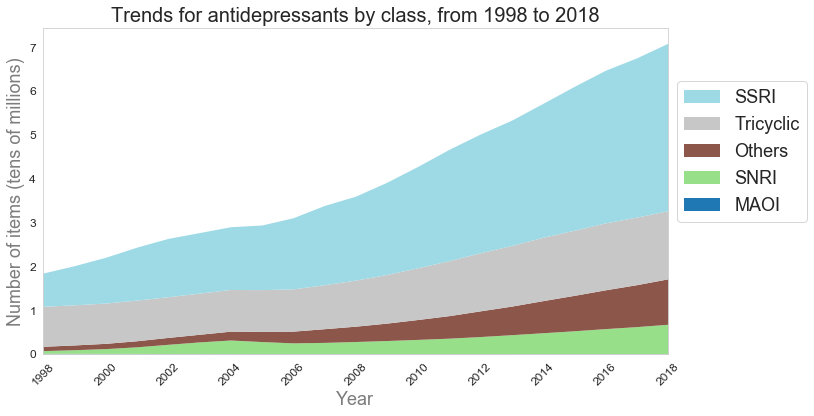

In [12]:
# Produce graph of class trends - raw data

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

dfraw2 = dfraw.reindex(columns=["MAOI","SNRI","Others","Tricyclic","SSRI"])

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax = dfraw2.plot(kind = "area", linewidth = 0, cmap = "tab20",figsize=(14, 6))
ax.set_xlabel('Year', fontsize="18",alpha=0.6)
ax.set_ylabel("Number of items (tens of millions)", size="18",alpha=0.6)
ax.set_title("Trends for antidepressants by class, from 1998 to 2018", size="20")
ax.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax.tick_params(labelsize=12)
ax.get_yaxis().get_offset_text().set_visible(False)
ax.set_xlim([1998,2018])
handles, labels = ax.get_legend_handles_labels()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(reversed(handles), reversed(labels),loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax.grid(False)
plt.savefig("/Users/paulbogowicz/Documents/Research/Oxford University/OpenPrescribing - antidepressants/Figures/Figure S1.pdf",format="pdf",bbox_inches='tight')

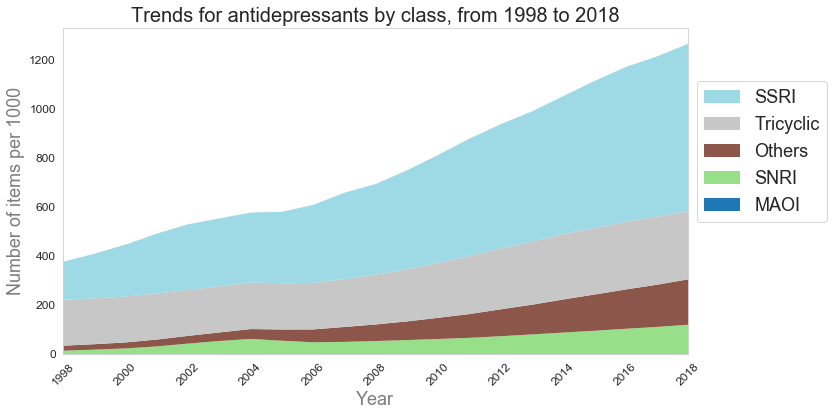

In [13]:
# Produce graph of class trends - standardized data

dfstand2 = dfstand.reindex(columns=["MAOI","SNRI","Others","Tricyclic","SSRI"])

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax = dfstand2.plot(kind = "area", linewidth = 0, cmap = "tab20",figsize=(14, 6))
ax.set_xlabel('Year', fontsize="18",alpha=0.6)
ax.set_ylabel("Number of items per 1000", size="18",alpha=0.6)
ax.set_title("Trends for antidepressants by class, from 1998 to 2018", size="20")
ax.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax.tick_params(labelsize=12)
ax.get_yaxis().get_offset_text().set_visible(False)
ax.set_xlim([1998,2018])
handles, labels = ax.get_legend_handles_labels()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(reversed(handles), reversed(labels),loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax.grid(False)
plt.savefig("/Users/paulbogowicz/Documents/Research/Oxford University/OpenPrescribing - antidepressants/Figures/Figure 1a.pdf",format="pdf",bbox_inches='tight')

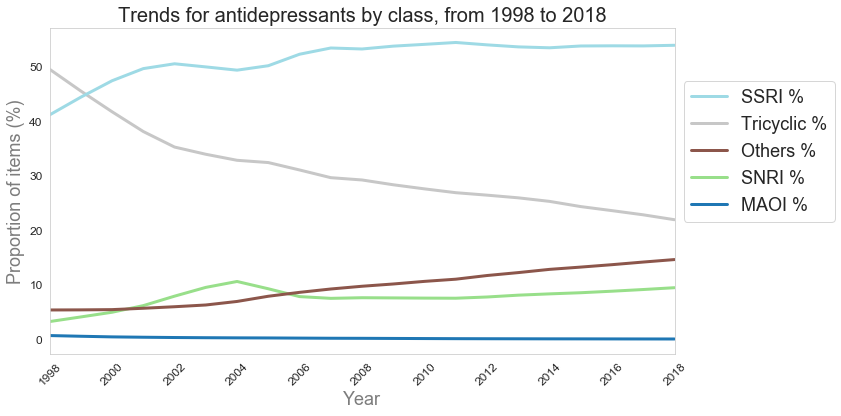

In [14]:
# Produce graph of class trends - proportions

dfraw3 = dfraw.reindex(columns=["MAOI %","SNRI %","Others %","Tricyclic %","SSRI %"])

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax = dfraw3.plot(kind = "line", linewidth = 3, cmap = "tab20",figsize=(14, 6)) # can also do as kind = "area"
ax.set_xlabel('Year', fontsize="18",alpha=0.6)
ax.set_ylabel("Proportion of items (%)", size="18",alpha=0.6)
ax.set_title("Trends for antidepressants by class, from 1998 to 2018", size="20")
ax.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax.tick_params(labelsize=12)
ax.get_yaxis().get_offset_text().set_visible(False)
ax.set_xlim([1998,2018])
handles, labels = ax.get_legend_handles_labels()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(reversed(handles), reversed(labels),loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax.grid(False)
plt.savefig("/Users/paulbogowicz/Documents/Research/Oxford University/OpenPrescribing - antidepressants/Figures/Figure 1b.pdf",format="pdf",bbox_inches='tight')

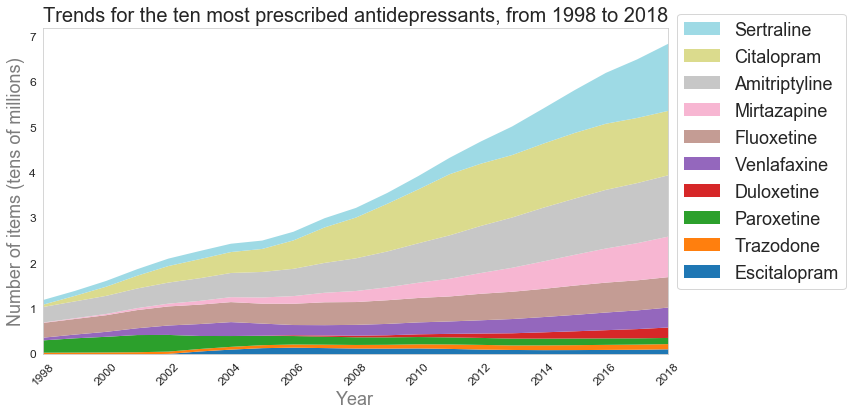

In [15]:
# Produce graph of top 10 most prescribed drugs (2018) - raw data

dfraw4 = dfraw.reindex(columns=["Escitalopram","Trazodone","Paroxetine","Duloxetine","Venlafaxine","Fluoxetine","Mirtazapine","Amitriptyline","Citalopram","Sertraline"])

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax = dfraw4.plot(kind = "area", linewidth = 0, cmap = "tab20",figsize=(14, 6))
ax.set_xlabel('Year', fontsize="18",alpha=0.6)
ax.set_ylabel("Number of items (tens of millions)", size="18",alpha=0.6)
ax.set_title("Trends for the ten most prescribed antidepressants, from 1998 to 2018", size="20")
ax.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax.tick_params(labelsize=12)
ax.get_yaxis().get_offset_text().set_visible(False)
ax.set_xlim([1998,2018])
handles, labels = ax.get_legend_handles_labels()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(reversed(handles), reversed(labels),loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax.grid(False)
plt.savefig("/Users/paulbogowicz/Documents/Research/Oxford University/OpenPrescribing - antidepressants/Figures/Figure S2.pdf",format="pdf",bbox_inches='tight')

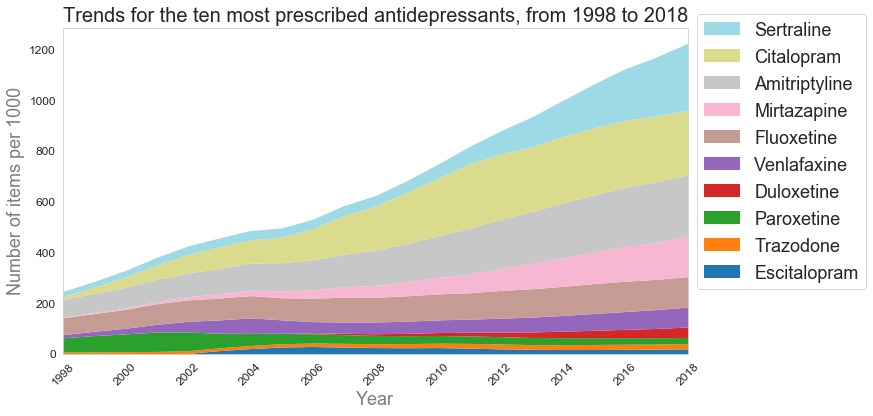

In [16]:
# Produce graph of top 10 most prescribed drugs (2018) - standardized data

dfstand3 = dfstand.reindex(columns=["Escitalopram","Trazodone","Paroxetine","Duloxetine","Venlafaxine","Fluoxetine","Mirtazapine","Amitriptyline","Citalopram","Sertraline"])

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax = dfstand3.plot(kind = "area", linewidth = 0, cmap = "tab20",figsize=(14, 6))
ax.set_xlabel('Year', fontsize="18",alpha=0.6)
ax.set_ylabel("Number of items per 1000", size="18",alpha=0.6)
ax.set_title("Trends for the ten most prescribed antidepressants, from 1998 to 2018", size="20")
ax.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax.tick_params(labelsize=12)
ax.get_yaxis().get_offset_text().set_visible(False)
ax.set_xlim([1998,2018])
handles, labels = ax.get_legend_handles_labels()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(reversed(handles), reversed(labels),loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax.grid(False)
plt.savefig("/Users/paulbogowicz/Documents/Research/Oxford University/OpenPrescribing - antidepressants/Figures/Figure 2a.pdf",format="pdf",bbox_inches='tight')

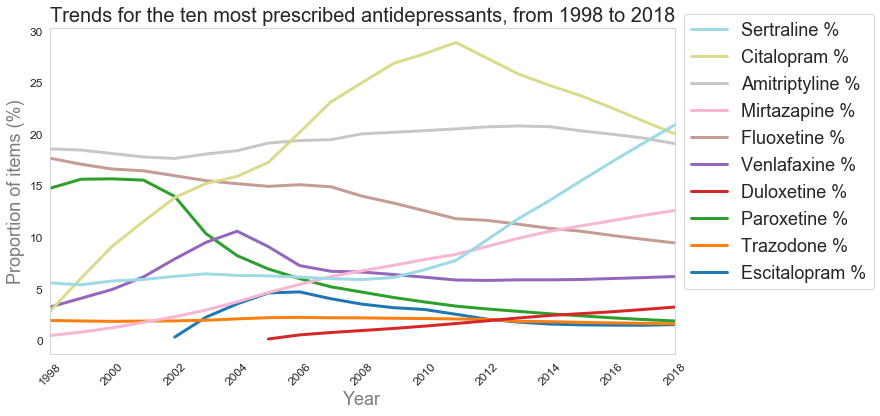

In [17]:
# Produce graph of top 10 most prescribed drugs (2018) - proportions

dfraw5 = dfraw.reindex(columns=["Escitalopram %","Trazodone %","Paroxetine %","Duloxetine %","Venlafaxine %","Fluoxetine %","Mirtazapine %","Amitriptyline %","Citalopram %","Sertraline %"])

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax = dfraw5.plot(kind = "line", linewidth = 3, cmap = "tab20",figsize=(14, 6)) # can also do as kind = "area"
ax.set_xlabel('Year', fontsize="18",alpha=0.6)
ax.set_ylabel("Proportion of items (%)", size="18",alpha=0.6)
ax.set_title("Trends for the ten most prescribed antidepressants, from 1998 to 2018", size="20")
ax.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax.tick_params(labelsize=12)
ax.get_yaxis().get_offset_text().set_visible(False)
ax.set_xlim([1998,2018])
handles, labels = ax.get_legend_handles_labels()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(reversed(handles), reversed(labels),loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax.grid(False)
plt.savefig("/Users/paulbogowicz/Documents/Research/Oxford University/OpenPrescribing - antidepressants/Figures/Figure 2b.pdf",format="pdf",bbox_inches='tight')

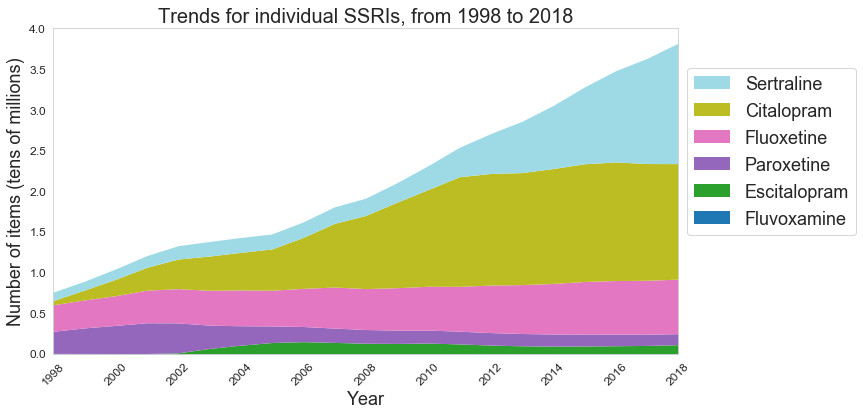

In [18]:
# Produce graph of SSRIs - raw data

# Select SSRIs

dfraw6 = dfraw.reindex(columns=["Fluvoxamine","Escitalopram","Paroxetine","Fluoxetine","Citalopram","Sertraline"])

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax = dfraw6.plot(kind = "area", linewidth = 0, cmap = "tab20",figsize=(14, 6))
ax.set_xlabel('Year', fontsize="18")
ax.set_ylabel("Number of items (tens of millions)", size="18")
ax.set_title("Trends for individual SSRIs, from 1998 to 2018", size="20")
ax.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax.tick_params(labelsize=12)
ax.get_yaxis().get_offset_text().set_visible(False)
ax.set_xlim([1998,2018])
handles, labels = ax.get_legend_handles_labels()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(reversed(handles), reversed(labels),loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax.grid(False)

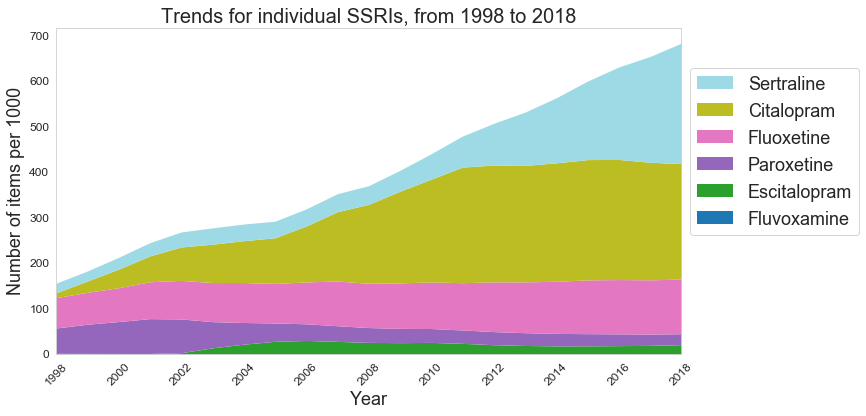

In [19]:
# Produce graph of SSRIs - standardized data

# Select SSRIs

dfstand4 = dfstand.reindex(columns=["Fluvoxamine","Escitalopram","Paroxetine","Fluoxetine","Citalopram","Sertraline"])

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax = dfstand4.plot(kind = "area", linewidth = 0, cmap = "tab20",figsize=(14, 6))
ax.set_xlabel('Year', fontsize="18")
ax.set_ylabel("Number of items per 1000", size="18")
ax.set_title("Trends for individual SSRIs, from 1998 to 2018", size="20")
ax.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax.tick_params(labelsize=12)
ax.get_yaxis().get_offset_text().set_visible(False)
ax.set_xlim([1998,2018])
handles, labels = ax.get_legend_handles_labels()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(reversed(handles), reversed(labels),loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax.grid(False)

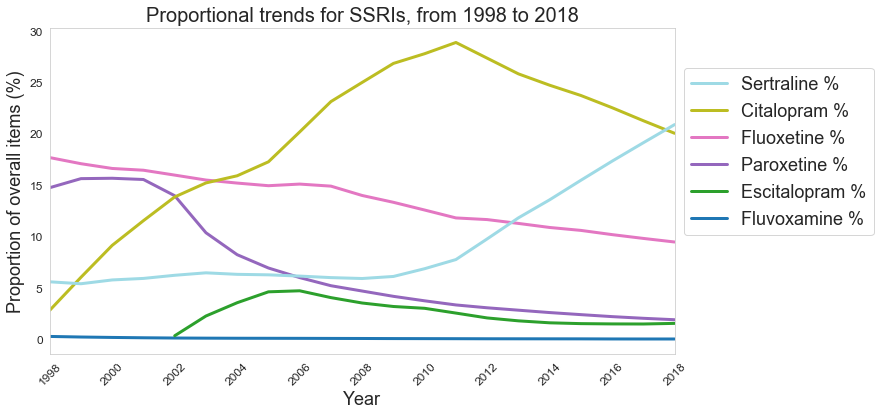

In [20]:
# Produce graph of SSRIs - proportional trends

# Select SSRI proportions

dfraw7 = dfraw.reindex(columns=["Fluvoxamine %","Escitalopram %","Paroxetine %","Fluoxetine %","Citalopram %","Sertraline %"])

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax = dfraw7.plot(kind = "line", linewidth = 3, cmap = "tab20",figsize=(14, 6))
ax.set_xlabel('Year', fontsize="18")
ax.set_ylabel("Proportion of overall items (%)", size="18")
ax.set_title("Proportional trends for SSRIs, from 1998 to 2018", size="20")
ax.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax.tick_params(labelsize=12)
ax.get_yaxis().get_offset_text().set_visible(False)
ax.set_xlim([1998,2018])
handles, labels = ax.get_legend_handles_labels()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(reversed(handles), reversed(labels),loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax.grid(False)

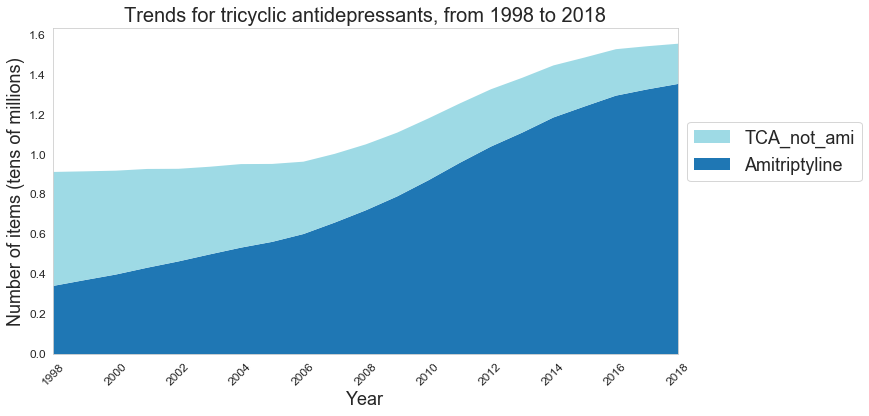

In [21]:
# Produce graph of trends for amitriptyline vs all other tricyclics - raw data

dfraw8 = dfraw.reindex(columns=["Amitriptyline","TCA_not_ami"])

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax = dfraw8.plot(kind = "area", linewidth = 0, cmap = "tab20",figsize=(14, 6))
ax.set_xlabel('Year', fontsize="18")
ax.set_ylabel("Number of items (tens of millions)", size="18")
ax.set_title("Trends for tricyclic antidepressants, from 1998 to 2018", size="20")
ax.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax.tick_params(labelsize=12)
ax.get_yaxis().get_offset_text().set_visible(False)
ax.set_xlim([1998,2018])
handles, labels = ax.get_legend_handles_labels()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(reversed(handles), reversed(labels),loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax.grid(False)

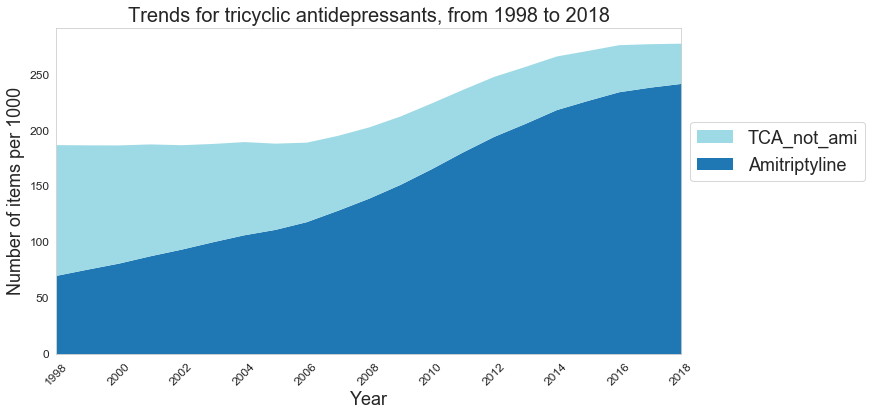

In [22]:
# Produce graph of trends for amitriptyline vs all other tricyclics - standardized data

dfstand5 = dfstand.reindex(columns=["Amitriptyline","TCA_not_ami"])

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax = dfstand5.plot(kind = "area", linewidth = 0, cmap = "tab20",figsize=(14, 6))
ax.set_xlabel('Year', fontsize="18")
ax.set_ylabel("Number of items per 1000", size="18")
ax.set_title("Trends for tricyclic antidepressants, from 1998 to 2018", size="20")
ax.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax.tick_params(labelsize=12)
ax.get_yaxis().get_offset_text().set_visible(False)
ax.set_xlim([1998,2018])
handles, labels = ax.get_legend_handles_labels()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(reversed(handles), reversed(labels),loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax.grid(False)

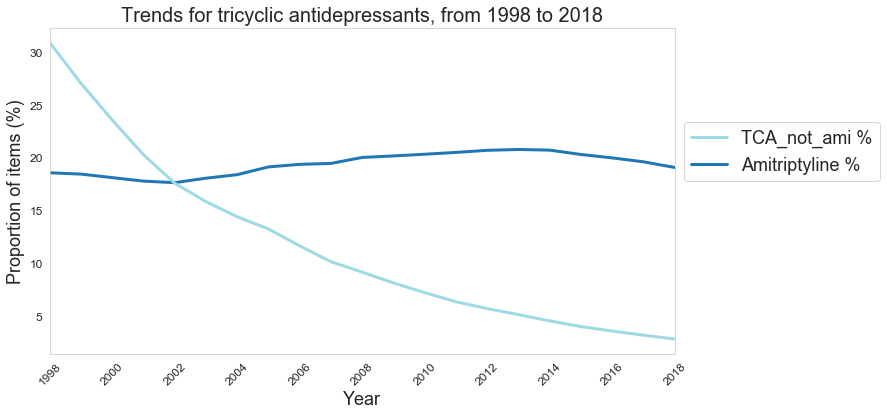

In [23]:
# Produce graph of proportional trends for tricyclics vs tricyclics excluding amitriptyline

dfraw9 = dfraw.reindex(columns=["Amitriptyline %","TCA_not_ami %"])

# Plot

sns.set_style("whitegrid",{'grid.color': '.9'})
ax = dfraw9.plot(kind = "line", linewidth = 3, cmap = "tab20",figsize=(14, 6)) # can also do as kind = "area"
ax.set_xlabel('Year', fontsize="18")
ax.set_ylabel("Proportion of items (%)", size="18")
ax.set_title("Trends for tricyclic antidepressants, from 1998 to 2018", size="20")
ax.set_xticks(np.arange(1998, 2019, step=2))
plt.xticks(rotation=45)
ax.tick_params(labelsize=12)
ax.get_yaxis().get_offset_text().set_visible(False)
ax.set_xlim([1998,2018])
handles, labels = ax.get_legend_handles_labels()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(reversed(handles), reversed(labels),loc='center left', bbox_to_anchor=(1, .62), fontsize='18')
ax.grid(False)